# Gradient Descent for linear Regression

In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [3]:
x_train = np.array([1, 2])
y_train = np.array([300, 500])

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = (1 / (2*m)) * cost
    
    return total_cost

In [5]:
#this function is used to calculate the gradient
#here dj_dw means derivative wrt to w
#here dj_db means derivative wrt to b
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_dw, dj_db

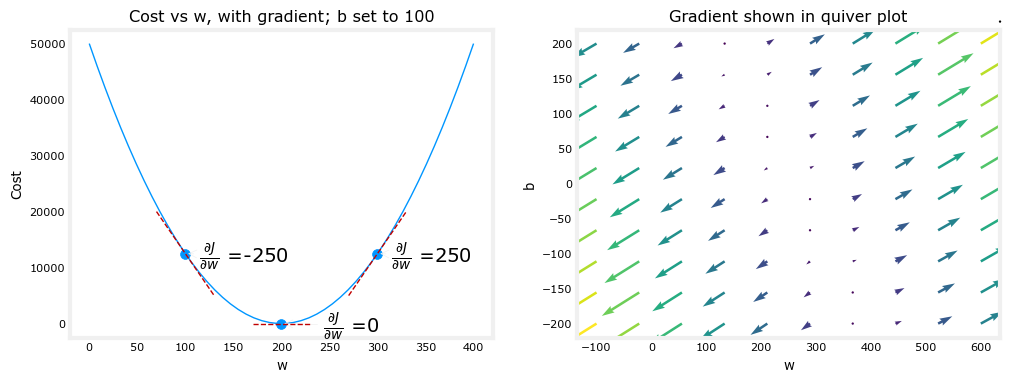

In [6]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

In [7]:
#now calculating the gradient descent based on above parameters and methods
'''here w and b is the updated value
J_history: history of cost function
p_history history of parameters [w,b]
num_iters : number of iterations to run gradient descent 
alpha : learning rate
w_in, b_in: initial values of model parameters
'''

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        #calculate gradient and update the parameters
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        if i < 100000:
            J_history.append( cost_function(x, y, w, b))
            p_history.append([w,b])
            
        #print cost at every 10 iterations
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4} : Cost {J_history[-1]: 0.2e}",
                 f"dj_dw : {dj_dw : 0.3e}, {dj_db : 0.3e} ",
                 f"w: {w: 0.3e}, b: {b: 0.5e}")
            
    return w, b, J_history, p_history, 

In [12]:
#initialize parameters
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

#run gradient descent function
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, 
                                                   iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final: .4f}, {b_final: .4f})")

Iteration    0 : Cost  7.93e+04 dj_dw : -6.500e+02, -4.000e+02  w:  6.500e+00, b:  4.00000e+00
Iteration 1000 : Cost  3.41e+00 dj_dw : -3.712e-01,  6.007e-01  w:  1.949e+02, b:  1.08228e+02
Iteration 2000 : Cost  7.93e-01 dj_dw : -1.789e-01,  2.895e-01  w:  1.975e+02, b:  1.03966e+02
Iteration 3000 : Cost  1.84e-01 dj_dw : -8.625e-02,  1.396e-01  w:  1.988e+02, b:  1.01912e+02
Iteration 4000 : Cost  4.28e-02 dj_dw : -4.158e-02,  6.727e-02  w:  1.994e+02, b:  1.00922e+02
Iteration 5000 : Cost  9.95e-03 dj_dw : -2.004e-02,  3.243e-02  w:  1.997e+02, b:  1.00444e+02
Iteration 6000 : Cost  2.31e-03 dj_dw : -9.660e-03,  1.563e-02  w:  1.999e+02, b:  1.00214e+02
Iteration 7000 : Cost  5.37e-04 dj_dw : -4.657e-03,  7.535e-03  w:  1.999e+02, b:  1.00103e+02
Iteration 8000 : Cost  1.25e-04 dj_dw : -2.245e-03,  3.632e-03  w:  2.000e+02, b:  1.00050e+02
Iteration 9000 : Cost  2.90e-05 dj_dw : -1.082e-03,  1.751e-03  w:  2.000e+02, b:  1.00024e+02
(w,b) found by gradient descent: ( 199.9929,  100.

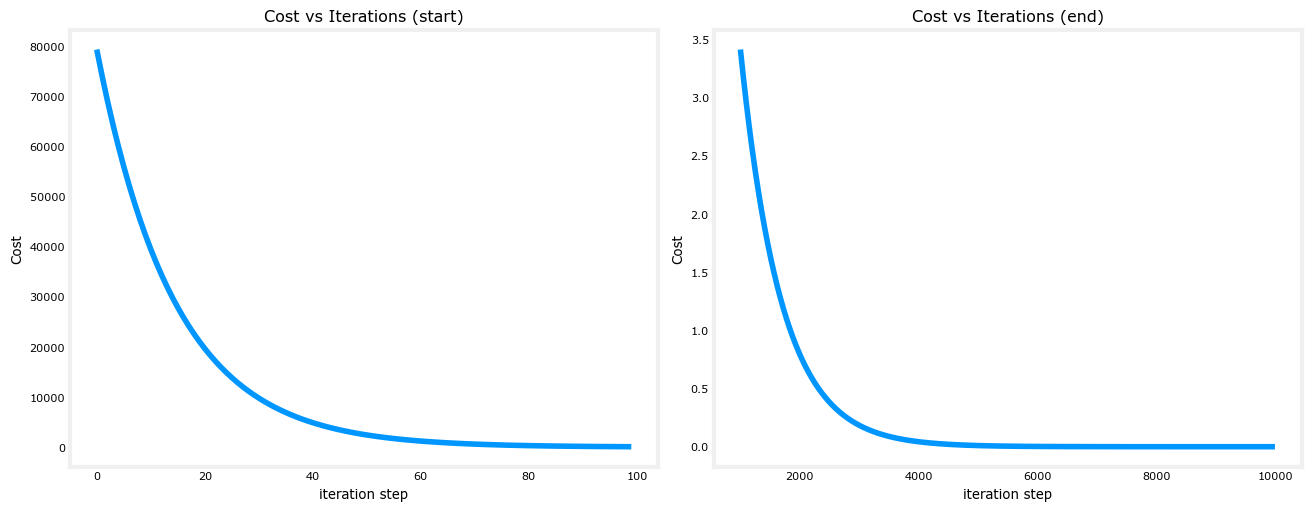

In [19]:
#plot of cost vs iterations 
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize = (13,5))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs Iterations (start)")
ax2.set_title("Cost vs Iterations (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [21]:
#now making the predictions on the data
#for 1000, 1200 and 2000 sq ft data
print(f"1000 sq ft home price is: {w_final * 1 + b_final: 0.1f} thousand dollars")
print(f"1200 sq ft home price is: {w_final * 1.2 + b-final:0.1f} thousand dollars")
print(f"20)

1000 sq ft home price is:  300.0 thousand dollars
